### Environmental Biophysics "Presentation"
#### Confirming the tower data makes sense and comparing temperature measurements to an independent site

In [1]:
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from os.path import join as j
from datetime import datetime

DIR = "/home/rave/sedgwick-biophysics/Processed_Flux_Tower_Data"
coyote_path = j(DIR,"coyote_bush_site")
grass_path = j(DIR,"grass_site")

def read_and_tidy(path):
    """Makes a datetime column for plotting and time series analysis. 
    Also shifts by 8 hours to Pacific time, this needs to be checked 
    against non tower data."""
    
    name_rows = pd.read_csv(path, skiprows=17, header=-1).iloc[0:2]
    name_row = name_rows.iloc[0,:] + " (" + name_rows.iloc[1,:] + ")"
    df = pd.read_csv(path, skiprows=19, names= name_row)
    df['HRMIN (HRMIN)'] = df['HRMIN (HRMIN)'].astype(str).apply(lambda x: x.zfill(4))
    df.index = pd.to_datetime(df['YEAR (YEAR)'].astype(str) + df['DOY (DOY)'].astype(str) + df['HRMIN (HRMIN)'].astype(str), format='%Y%j%H%M')
    return df

In [2]:
coyote = read_and_tidy(j(coyote_path, "eddypro_adv_ameriflux_2019-03-28T081423_adv.csv"))

In [3]:
grass = read_and_tidy(j(grass_path, "eddypro_adv_ameriflux_2019-03-28T081623_adv.csv"))

### Here is what Dar's Airstrip site looks like
#### http://www.geog.ucsb.edu/ideas/

![Airstrip Met Station](airstrip.jpg)

The hottest time of day is usually around 4pm because of the balance between upwelling infrared radiation and convection of heat away from ~1.5 meters above the surface. Our tower data agrees pretty well with each other and Dar's Airstrip site.

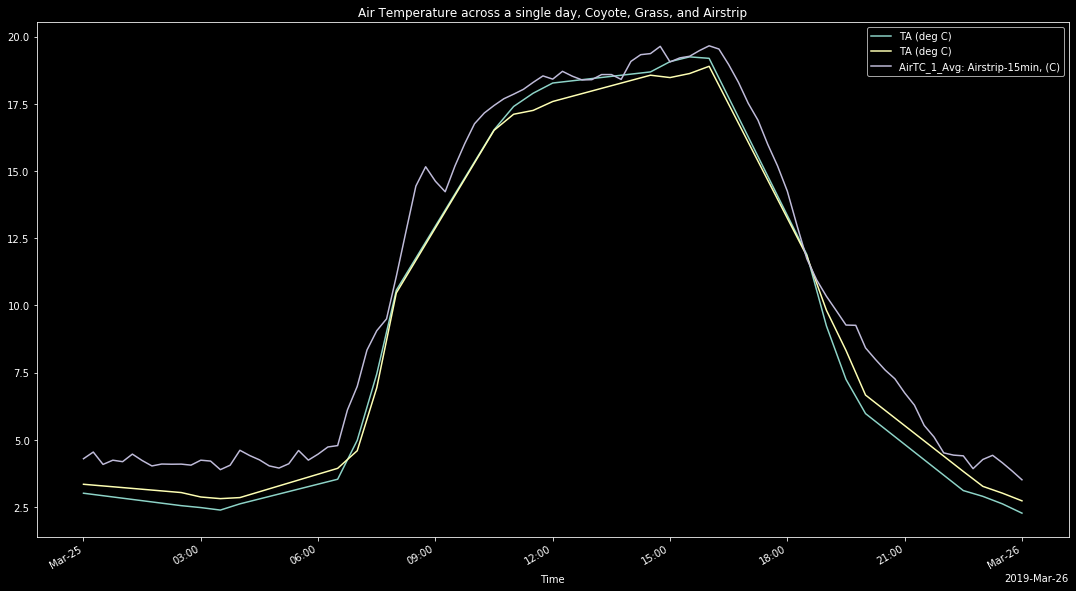

In [23]:
plt.style.use('dark_background')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
    
def plot_nice_date(df, site_name, y, fig, ax, title=''):
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)


    line = df.shift(-8, freq ='H')\
        .loc[datetime(year = 2019, month = 3, day = 25):datetime(year = 2019, month = 3, day = 26)]\
        .plot(ax =ax, y = y, x_compat=True)
    ax.set_title(title)

plot_nice_date(coyote, "coyote", "TA (deg C)", fig, ax)
plot_nice_date(grass, "grass", "TA (deg C)", fig, ax)

airstrip = pd.read_csv("Processed_Flux_Tower_Data/Airstrip-15min.csv", sep="\t")
airstrip.index = pd.to_datetime(airstrip['Time'])

plot_nice_date(airstrip, "Airstrip (Dar's)", "AirTC_1_Avg: Airstrip-15min, (C)", fig, ax, title='Air Temperature across a single day, Coyote, Grass, and Airstrip')

### Why does the Airstrip have a more variable temperature series than the valley sites?

It's mostly because it is averaged at a fifteen minute interval rather than a 30 minute interval, but some of it may be because of the difference in topography between the valley sites and the airstrip site, which is more exposed. 

Would you expect the airstrip site to have more fine scale variation in temperature because it experiences more convective turbulence? 

Intuitively I would expect that horizontal valley winds along a thermal gradient would reduce the finer scale vertical gradients in temperature and turbulence, leading to less fine scale temperature variation through time.

In [20]:
coyote.columns

Index(['YEAR (YEAR)', 'GAP (GAP)', 'DTIME (DTIME)', 'DOY (DOY)',
       'HRMIN (HRMIN)', 'UST (m/s)', 'TA (deg C)', 'WD (deg)', 'WS (m/s)',
       'NEE (umol/m2/s)', 'FC (umol/m2/s)', 'SFC (umol/m2/s)', 'H (W/m2)',
       'SH (W/m2)', 'LE (W/m2)', 'SLE (W/m2)', 'FG (W/m2)', 'TS1 (deg C)',
       'TSdepth1 (cm)', 'TS2 (deg C)', 'TSdepth2 (cm)', 'PREC (mm)', 'RH (%)',
       'PRESS (kPa)', 'CO2 (umol/mol)', 'VPD (kPa)', 'SWC1 (%)', 'SWC2 (%)',
       'Rn (W/m2)', 'PAR (umol/m2/s)', 'Rg (W/m2)', 'Rgdif (W/m2)',
       'PARout (umol/m2/s)', 'RgOut (W/m2)', 'Rgl (W/m2)', 'RglOut (W/m2)',
       'H2O (mmol/mol)', 'RE (umol/m2/s)', 'GPP (umol/m2/s)',
       'CO2top (umol/mol)', 'CO2height (m)', 'APAR (umol/m2/s)',
       'PARdif (umol/m2/s)', 'APARpct (%)', 'ZL (unitless)'],
      dtype='object')

Our relative humidity sensors in the valley appear to be restricted in the range of values they can record.

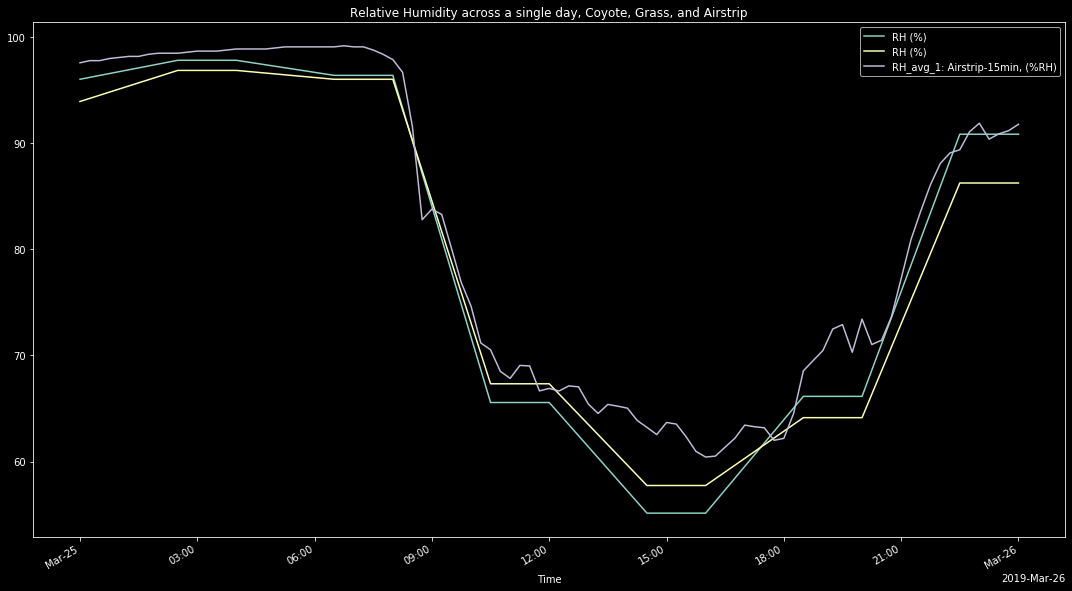

In [24]:
plt.style.use('dark_background')

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

plot_nice_date(coyote, "coyote", "RH (%)", fig, ax)
plot_nice_date(grass, "grass", "RH (%)", fig, ax)

airstrip = pd.read_csv("Processed_Flux_Tower_Data/Airstrip-15min.csv", sep="\t")
airstrip.index = pd.to_datetime(airstrip['Time'])

plot_nice_date(airstrip, "Airstrip (Dar's)", "RH_avg_1: Airstrip-15min, (%RH)", fig, ax, title='Relative Humidity across a single day, Coyote, Grass, and Airstrip')

When comparing GPP for our valley sites, something is wrong. No data values are creeping in and not being filtered out somewhere.

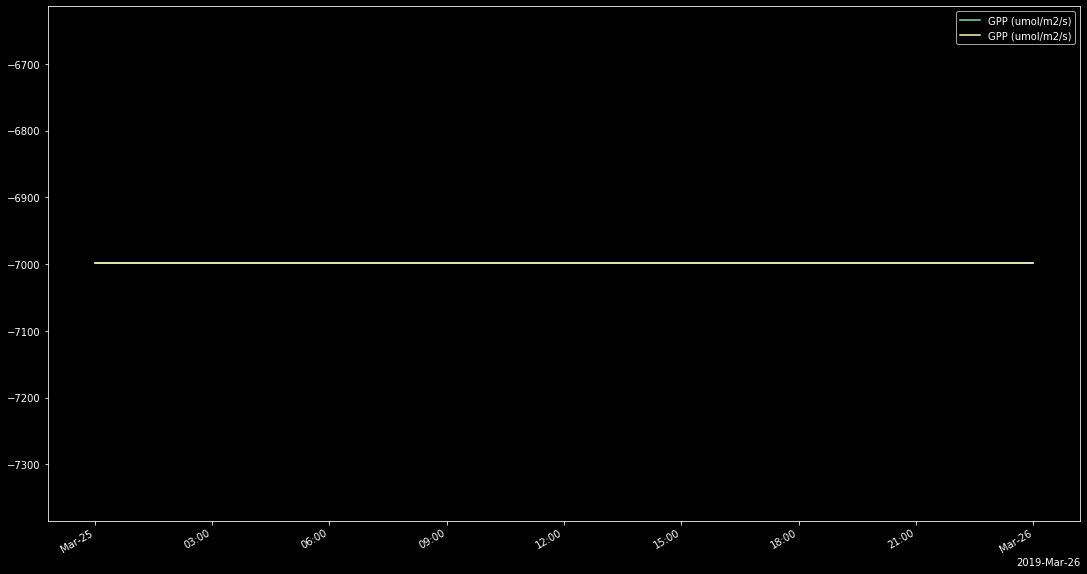

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

plot_nice_date(coyote, "coyote", "GPP (umol/m2/s)", fig, ax)
plot_nice_date(grass, "grass", "GPP (umol/m2/s)", fig, ax)